## Importing Libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Area of Public Opinion

### "Products and services using AI have more benefits than drawbacks" agree

In [193]:
df = pd.read_csv("datasets/public-opinion/data/fig-812.csv")
df

,Country,Year,"% of respondents that ""Agree"""
0,China,2022,78%
1,Indonesia,2022,NaN
2,Thailand,2022,NaN
3,Mexico,2022,65%
4,Peru,2022,70%
...,...,...,...
135,Belgium,Point change 2022 vs. 2024,0%
136,Netherlands,Point change 2022 vs. 2024,3%
137,Romania,Point change 2022 vs. 2024,NaN
138,Russia,Point change 2022 vs. 2024,NaN


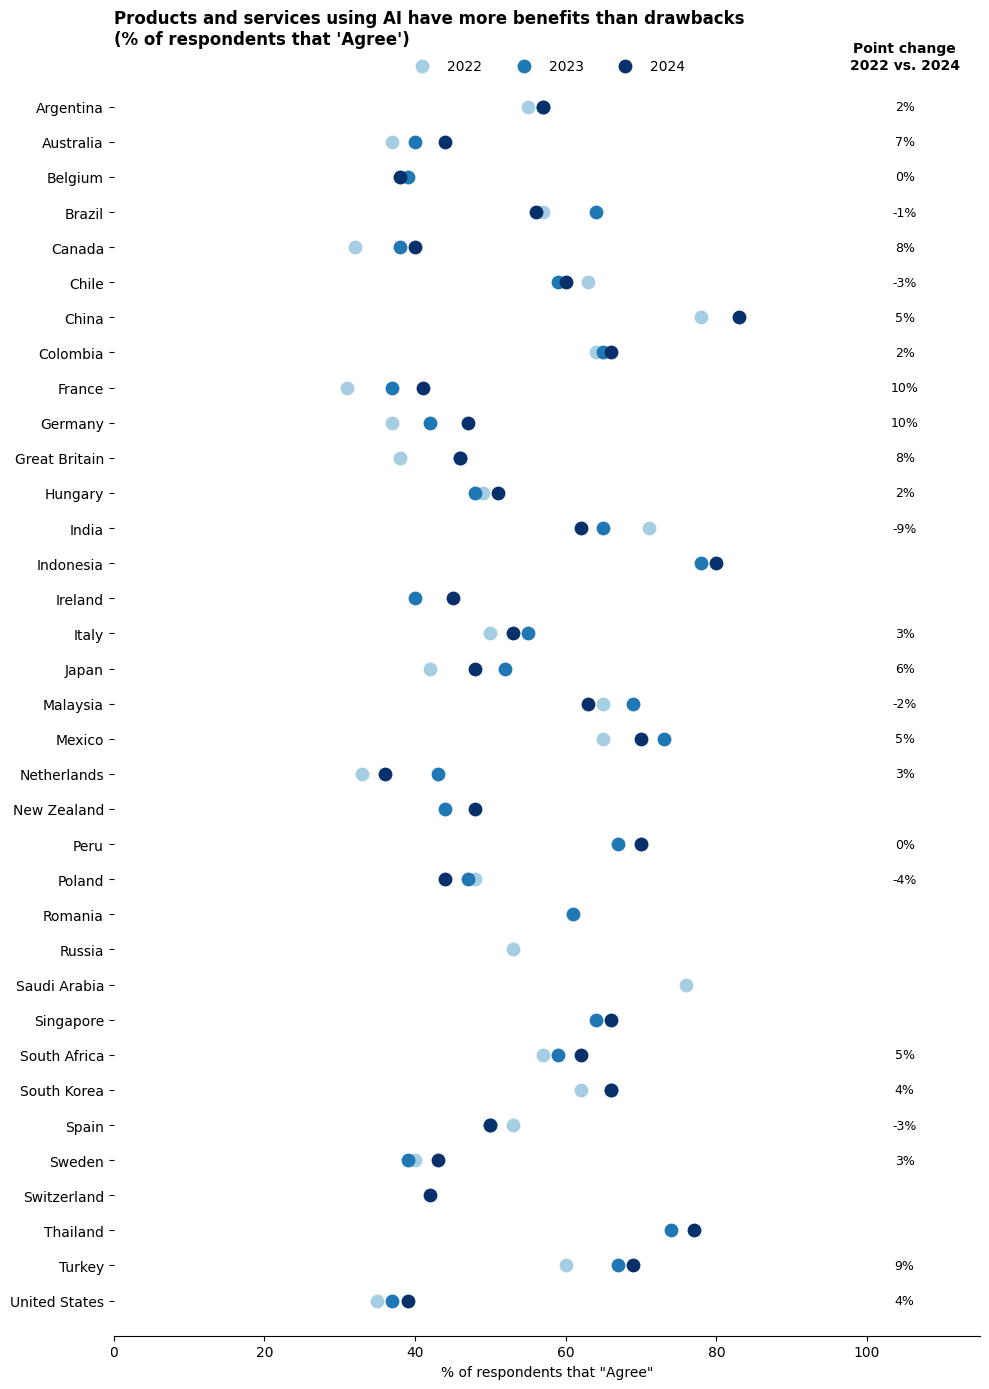

In [196]:
df.columns = df.columns.str.strip()
df['Country'] = df['Country'].str.strip()

def clean_pct(x):
    if isinstance(x, str):
        return float(x.replace('%', ''))
    return float(x)
df['Value'] = df['% of respondents that "Agree"'].apply(clean_pct)

years_mask = df['Year'].isin(['2022', '2023', '2024'])
df_years = df[years_mask].copy()
df_change = df[~years_mask].copy()

df_plot = df_years.pivot(index='Country', columns='Year', values='Value')

df_change = df_change.set_index('Country')['Value']
df_plot['Change'] = df_change

df_plot = df_plot.sort_index(ascending=False)

fig, ax = plt.subplots(figsize=(10, 14))

countries = df_plot.index
y_pos = range(len(countries))
ax.set_ylim(-1, len(countries))
ax.set_xlim(0, 115)

#ax.hlines(y=y_pos, xmin=0, xmax=100, color='gray', alpha=0.2, linewidth=1, zorder=1)

ax.scatter(df_plot['2022'], y_pos, color='#a6cee3', label='2022', s=80, zorder=3)
ax.scatter(df_plot['2023'], y_pos, color='#1f78b4', label='2023', s=80, zorder=3)
ax.scatter(df_plot['2024'], y_pos, color='#08306b', label='2024', s=80, zorder=3)

ax.set_yticks(y_pos)
ax.set_yticklabels(countries, fontsize=10)

ax.text(105, len(countries), 'Point change\n2022 vs. 2024',
        fontsize=10, fontweight='bold', ha='center', va='bottom')

for i, (country, row) in enumerate(df_plot.iterrows()):
    change = row['Change']
    if pd.notna(change):
        text_label = f"{change:.0f}%"
        ax.text(105, i, text_label, ha='center', va='center', fontsize=9, color='black')

ax.set_xlabel('% of respondents that "Agree"')
ax.set_title("Products and services using AI have more benefits than drawbacks\n(% of respondents that 'Agree')",
             loc='left', fontsize=12, fontweight='bold', pad=20)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=3, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

## Area of Research and Development

### Number of AI publications in CS worldwide (2013-2023)

In [6]:
df = pd.read_csv("datasets/research-and-development/data/fig-111.csv")

df.set_index("Year")

,Number of AI publications in CS (in thousands)
Year,
2013,101.885
2014,104.410
2015,105.736
2016,107.266
2017,116.937
2018,139.717
2019,164.202
2020,181.121
2021,204.064


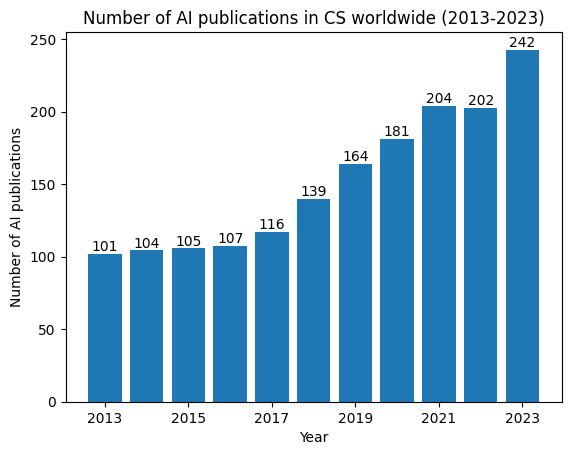

In [10]:
df = df.rename(columns={df.columns[1]: 'Amount'})

plt.bar(df['Year'], df['Amount'])

plt.title("Number of AI publications in CS worldwide (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Number of AI publications")
plt.xticks([i for i in range(2013, 2024, 2)])

for i in range(len(df['Year'])):
    x = df['Year'][i]
    y = df['Amount'][i]
    plt.text(x, y, f"{int(y)}", ha='center', va='bottom')

plt.show()

### Number of notable AI models by geographic area (2003–2024)

In [3]:
df = pd.read_csv("datasets/research-and-development/data/fig-133.csv")
df

,Geographic area,"Number of notable machine learning models, 2003-24 (sum)"
0,Argentina,1
1,Sweden,1
2,Russia,1
3,Norway,1
4,Italy,1
5,Spain,1
6,Iran,1
7,India,2
8,Austria,2
9,Belgium,2


In [4]:
df.columns = ['Geographic area', 'ML models count']

In [5]:
import plotly.express as px

country_to_iso = {
    'Argentina': 'ARG', 'Sweden': 'SWE', 'Russia': 'RUS', 'Norway': 'NOR', 'Italy': 'ITA',
    'Spain': 'ESP', 'Iran': 'IRN', 'India': 'IND', 'Austria': 'AUT', 'Belgium': 'BEL',
    'Saudi Arabia': 'SAU', 'Ireland': 'IRL', 'Poland': 'POL', 'Taiwan': 'TWN',
    'United Arab Emirates': 'ARE', 'Finland': 'FIN', 'Czech Republic': 'CZE',
    'Netherlands': 'NLD', 'Australia': 'AUS', 'Japan': 'JPN', 'Singapore': 'SGP',
    'Hong Kong': 'HKG', 'Israel': 'ISR', 'Switzerland': 'CHE', 'South Korea': 'KOR',
    'France': 'FRA', 'Germany': 'DEU', 'Canada': 'CAN', 'United Kingdom': 'GBR',
    'China': 'CHN', 'United States': 'USA'
}

df['iso_alpha'] = df['Geographic area'].map(country_to_iso)

fig = px.choropleth(
    df,
    locations='iso_alpha',
    color='ML models count',
    hover_name='Geographic area',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Number of notable AI models by geographic area (2003–2024)',
    labels={'ML models count': 'Number of Models'},
    locationmode='ISO-3'
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0}
)
fig.show()

### Training compute of select notable AI models in the USA and China (2018-2024)

In [48]:
df = pd.read_csv("datasets/research-and-development/data/fig-1317.csv")
df['Color'] = df.apply(lambda row: 'red' if row['Label'] == 'United States' else 'blue', axis=1)
df['Publication date'] = pd.to_datetime(df['Publication date'])
df

,Publication date,Training compute (petaFLOP – log scale),Label,Color
0,2018-02-01,3.600000e+02,United States,red
1,2018-03-22,2.400000e+02,United States,red
2,2018-05-03,1.270000e+02,United States,red
3,2018-06-01,1.757812e+04,United States,red
4,2018-08-28,4.780800e+05,United States,red
...,...,...,...,...
97,2024-09-19,7.851600e+09,China,blue
98,2024-09-19,7.800000e+09,China,blue
99,2024-10-28,2.505000e+10,China,blue
100,2024-11-06,3.492370e+09,China,blue


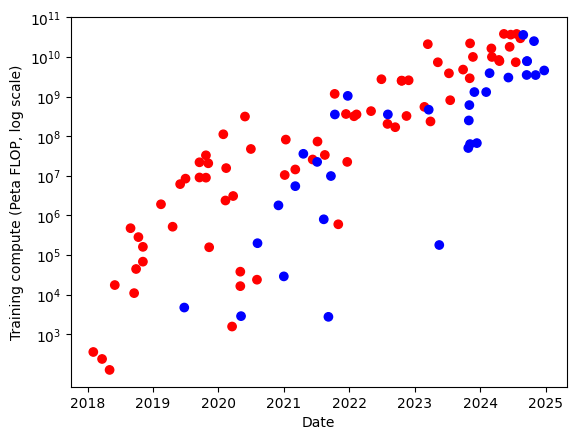

In [52]:
df = df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Amount'})

plt.scatter(df['Date'], df['Amount'], color=df['Color'])
plt.xlabel("Date")
plt.ylabel("Training compute (Peta FLOP, log scale)")
plt.yscale('log')
plt.yticks([10**i for i in range(3, 12)])

plt.show()

## Area of Responsible AI

### Hallucination rate

In [24]:
df = pd.read_csv("datasets/responsible-ai/data/fig-328.csv")
df['Amount'] = df.apply(lambda row: float(row['Hallucination Rate'][:-1]), axis=1)
df

,Model,Hallucination Rate,Amount
0,ai21labs/AI21-Jamba-1.5-Mini,2.90%,2.9
1,Qwen/Qwen2.5-7B-Instruct,2.80%,2.8
2,Intel/neural-chat-7b-v3-3,2.60%,2.6
3,microsoft/Orca-2-13b,2.50%,2.5
4,microsoft/Phi-3.5-MoE-instruct,2.50%,2.5
5,openai/o1,2.40%,2.4
6,deepseek/deepseek-chat,2.40%,2.4
7,openai/GPT-3.5-Turbo,1.90%,1.9
8,openai/GPT-4,1.80%,1.8
9,openai/GPT-4o-mini,1.70%,1.7


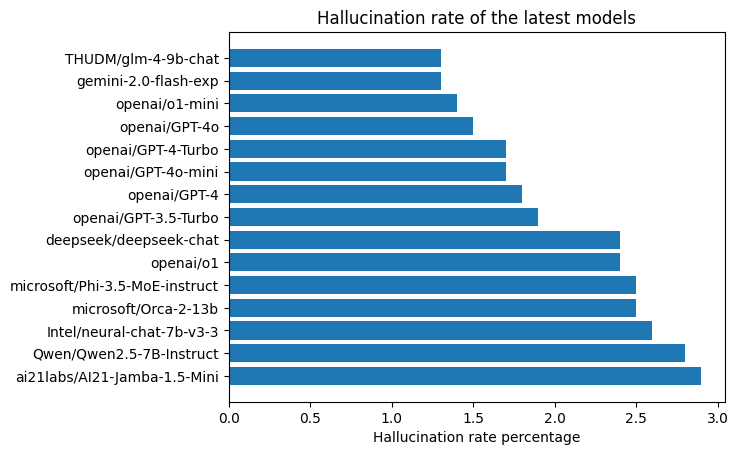

In [27]:
plt.barh(df['Model'], df['Amount'])

plt.xlabel("Hallucination rate percentage")
plt.title("Hallucination rate of the latest models")
plt.show()

### Percentage of organizations who experienced AI incidents

In [116]:
df = pd.read_csv("datasets/responsible-ai/data/fig-334.csv")
df

,Response,% of respondents
0,Yes,8%
1,No,89%
2,Unknown,3%


In [117]:
df = df.rename(columns={df.columns[1]: 'Amount'})
df['Amount'] = df.apply(lambda row: int(row['Amount'][:-1]), axis=1)

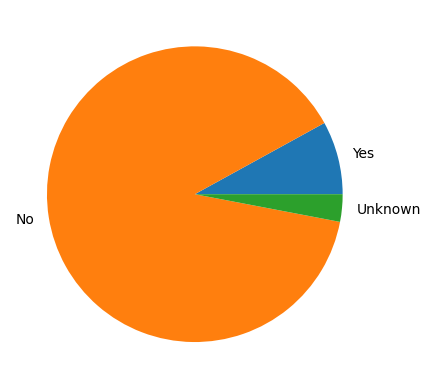

In [118]:
plt.pie(df['Amount'], labels=df['Response'])
plt.show()

### Number of AI incidents by organization

In [29]:
df = pd.read_csv("datasets/responsible-ai/data/fig-335.csv")
df

,% of Respondents,Number of AI Incidents
0,5%,Unknown
1,11%,10+
2,13%,6–9
3,30%,3–5
4,42%,1–2


In [30]:
df = df.rename(columns={df.columns[0]: 'Amount', df.columns[1]: 'Label'})
df['Amount'] = df.apply(lambda row: int(row['Amount'][:-1]), axis=1)
df

,Amount,Label
0,5,Unknown
1,11,10+
2,13,6–9
3,30,3–5
4,42,1–2


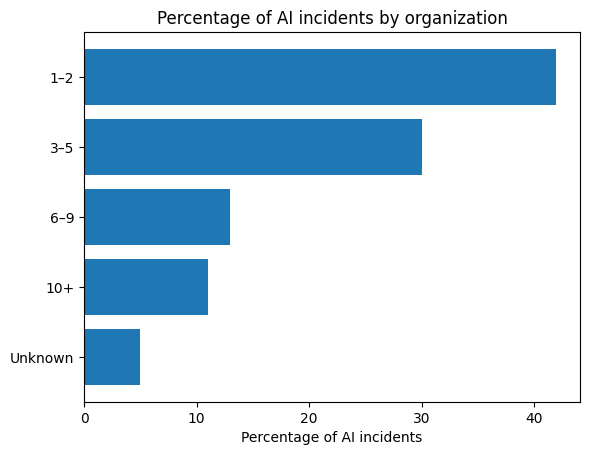

In [33]:
plt.barh(df['Label'], df['Amount'])
plt.title("Percentage of AI incidents by organization")
plt.xlabel("Percentage of AI incidents")
plt.xticks([i*10 for i in range(5)])
plt.show()

### AI related types of incidents in the past two years

In [35]:
df = pd.read_csv("datasets/responsible-ai/data/fig-339.csv")
df

,% of Respondents,Incident type
0,46%,Performance failure
1,47%,Model bias
2,51%,Unintended decision making
3,55%,Privacy violation
4,56%,Adversarial attack


In [36]:
df = df.rename(columns={df.columns[0]: 'Amount', df.columns[1]: 'Label'})
df['Amount'] = df.apply(lambda row: int(row['Amount'][:-1]), axis=1)
df

,Amount,Label
0,46,Performance failure
1,47,Model bias
2,51,Unintended decision making
3,55,Privacy violation
4,56,Adversarial attack


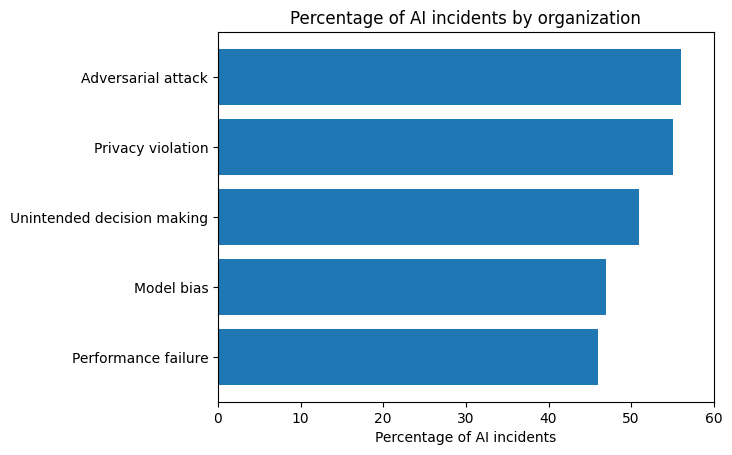

In [37]:
plt.barh(df['Label'], df['Amount'])
plt.title("Percentage of AI incidents by organization")
plt.xlabel("Percentage of AI incidents")
plt.xticks([i*10 for i in range(7)])
plt.show()

## Area of Scienze and Medicine

### Top 10 ethical concerns discussed in medical AI ethics publications, 2020-2024

In [72]:
df = pd.read_csv("datasets/science-and-medicine/data/fig-553.csv")
df = df.rename(columns={df.columns[1]: 'Amount'})
df

,Ethical concern,Amount,Year
0,Bias,23%,2020
1,Privacy,30%,2020
2,Equity,7%,2020
3,Transparency,15%,2020
4,Trust,11%,2020
5,Security,12%,2020
6,Accessibility,6%,2020
7,Stakeholders,7%,2020
8,Fairness,7%,2020
9,Safety,7%,2020


In [73]:
df['Amount'] = df.apply(lambda row: int(row['Amount'][:-1]), axis=1)
df

,Ethical concern,Amount,Year
0,Bias,23,2020
1,Privacy,30,2020
2,Equity,7,2020
3,Transparency,15,2020
4,Trust,11,2020
5,Security,12,2020
6,Accessibility,6,2020
7,Stakeholders,7,2020
8,Fairness,7,2020
9,Safety,7,2020


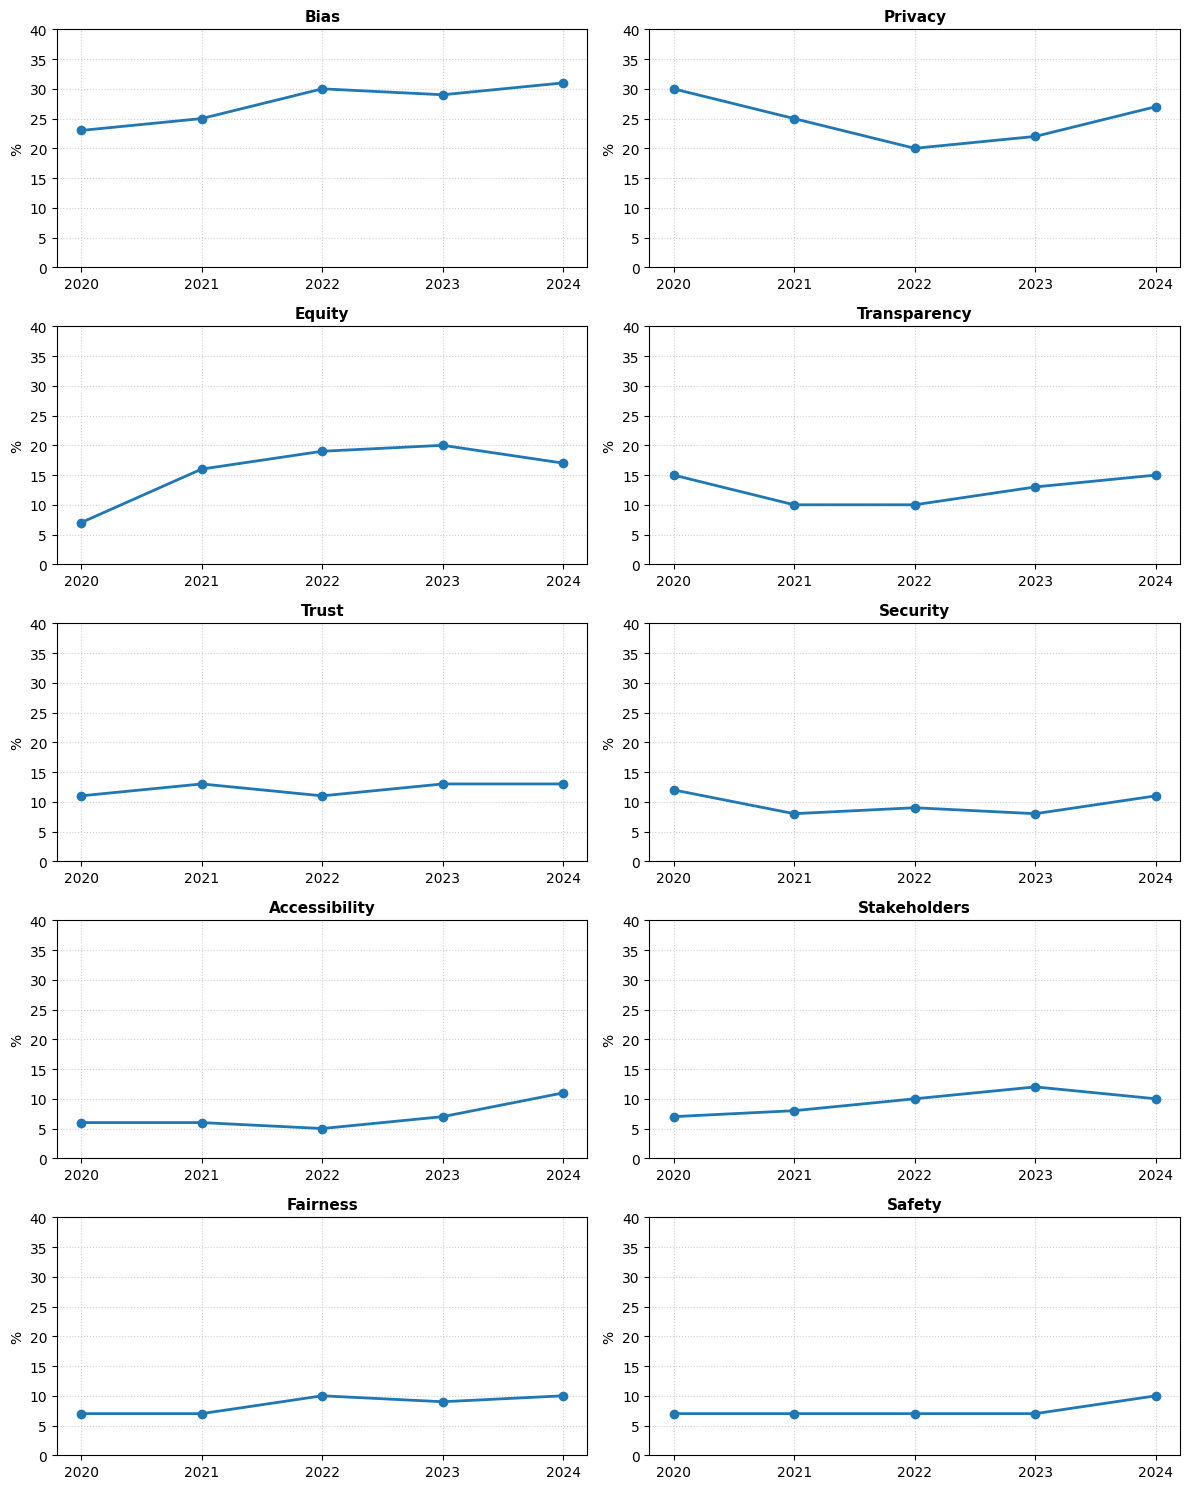

In [74]:
categories = df[df.columns[0]].unique()
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))
axes_flat = axes.flatten() # Appiattiamo per iterare facilmente

for i, category in enumerate(categories):
    if i < 10:
        ax = axes_flat[i]
        subset = df[df[df.columns[0]] == category].sort_values('Year')
        ax.plot(subset['Year'], subset['Amount'],
                marker='o',
                linestyle='-',
                linewidth=2,
                color='#1f77b4')
        ax.set_title(category, fontsize=11, fontweight='bold')
        ax.set_ylim(0, 40)
        ax.set_ylabel('%')

        unique_years = subset['Year'].unique()
        ax.set_xticks(unique_years)

        ax.grid(True, linestyle=':', alpha=0.6)

for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

### Number of AI medical devices approved by the FDA

In [58]:
df = pd.read_csv("datasets/science-and-medicine/data/fig-5410.csv")
df


,Year,Number of AI medical devices
0,1995,1
1,1997,1
2,1998,1
3,2001,1
4,2004,1
5,2005,1
6,2008,5
7,2010,2
8,2011,2
9,2012,3


Text(0.5, 1.0, 'Number of AI devices approved by FDA')

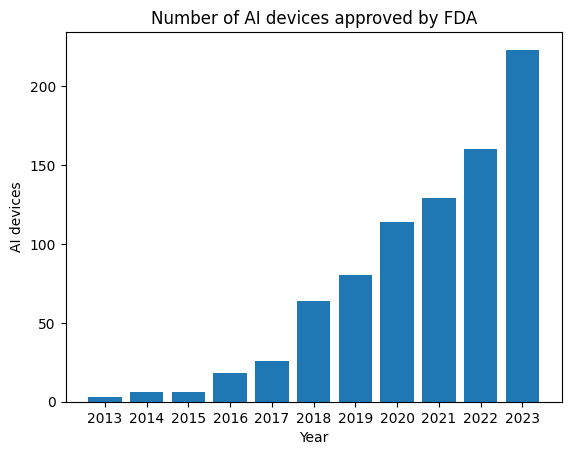

In [169]:
df = df.rename(columns={df.columns[1]: 'Amount'})[df['Year']>2012]

plt.bar(df['Year'], df['Amount'])
plt.ylabel("AI devices")
plt.xlabel("Year")
plt.xticks([i for i in range(2013, 2024)])
plt.title("Number of AI devices approved by FDA")

### LLM performance in clinical diagnosis

In [173]:
df = pd.read_csv("datasets/science-and-medicine/data/fig-546.csv")
df

,Group,total_pct
0,Physician + conventional resources only,55.263158
1,Physician + conventional resources only,73.684211
2,Physician + conventional resources only,68.421053
3,Physician + conventional resources only,52.631579
4,Physician + conventional resources only,89.473684
...,...,...
257,GPT-4 alone,94.736842
258,GPT-4 alone,100.000000
259,GPT-4 alone,73.684211
260,GPT-4 alone,97.368421


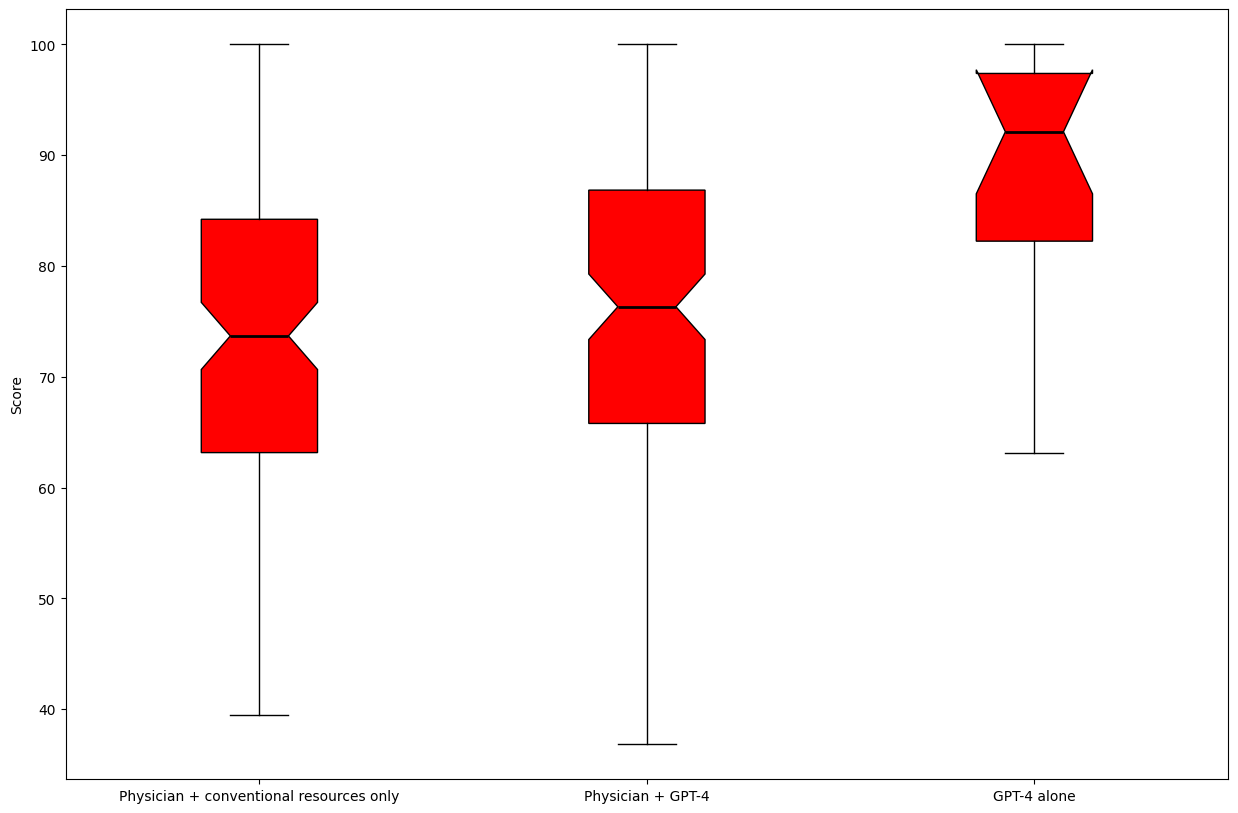

In [174]:
boxplot = [
    df[df['Group'] == 'Physician + conventional resources only']['total_pct'],
    df[df['Group'] == 'Physician + GPT-4']['total_pct'],
    df[df['Group'] == 'GPT-4 alone']['total_pct']
]

labels = [
    'Physician + conventional resources only',
    'Physician + GPT-4',
    'GPT-4 alone'
]

fig, ax = plt.subplots(figsize=(15, 10))

# Creazione dei boxplot
bplot = ax.boxplot(boxplot, patch_artist=True, notch=True)

# Colore dei boxplot
for patch, color in zip(bplot['boxes'], ['red' for label in labels]):
    patch.set_facecolor(color)

# Stanghette bianche
for median in bplot['medians']:
    median.set_color('black')
    median.set_linewidth(2)

# Outliers bianchi
for flier in bplot['fliers']:
    flier.set(marker='o', color='black', markerfacecolor='black', markeredgecolor='black')

# Bastoncini bianchi
for whisker in bplot['whiskers']:
    whisker.set(color='black')

# Range interquartile bianco
for cap in bplot['caps']:
    cap.set(color='black')

# Etichette sugli assi x
ax.set_xticklabels(labels)
plt.ylabel('Score')
plt.show()

## Area of Technical Performance

### Performance of top closed/open models

In [54]:
df = pd.read_csv("datasets/technical-performance/data/fig-2134.csv")
df['Year'] = pd.to_datetime(df['Year'])
df

,Year,Score,Label
0,2024-01-01,1124.493563,open
1,2024-02-01,1146.586521,open
2,2024-03-01,1148.229282,open
3,2024-04-01,1209.577290,open
4,2024-05-01,1209.646296,open
5,2024-06-01,1214.139389,open
6,2024-07-01,1262.234681,open
7,2024-08-01,1266.298806,open
8,2024-09-01,1266.484737,open
9,2024-10-01,1270.736375,open


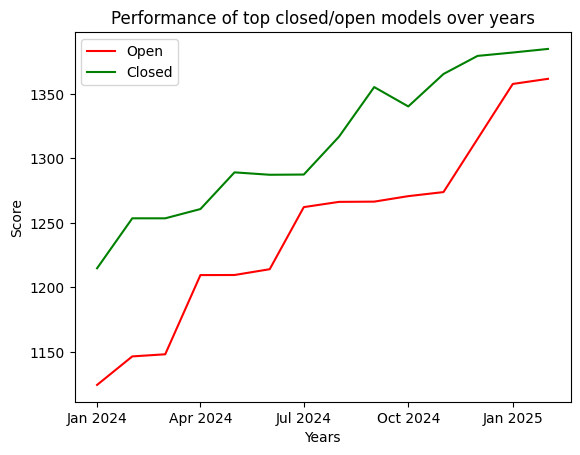

In [56]:
df_open = df[df['Label'] == 'open']
df_close = df[df['Label'] == 'closed']

plt.plot(df_open['Year'], df_open['Score'], color='red', label='Open')
plt.plot(df_close['Year'], df_close['Score'], color='green', label='Closed')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel('Years')
plt.ylabel('Score')
plt.title('Performance of top closed/open models over years')
plt.legend()
plt.show()